## Import Data & Data Preprocessing


- 导入并查看数据信息（retail.xlsx），统计每个属性缺失值数量，处理缺失值（丢弃）；
- 确定已取消的交易并删除；
- 异常值处理；（举例：可以将异常值定义为位于1% 和 99% 分位数之外的值，并使用阈值来代替数据中的异常值）
- 因为每个stock code代表一种产品，所以Description和StockCode的唯一值应该相等，删除代表多种产品stock codes；
- stock code中的POST表示邮费，并不代表产品，将其删除；


In [17]:
import pandas as pd

# 1. 导入并查看数据信息
file_path = 'retail.xlsx'
data1 = pd.read_excel(file_path)
print("原始数据信息：")
print(data1.info())

# 2. 统计每个属性的缺失值数量
missing_values = data1.isnull().sum()
print("\n缺失值数量统计：")
print(missing_values)

# 3. 处理缺失值（丢弃）
data2 = data1.dropna()

# 打印处理后的数据信息
print("\n处理缺失值后的数据信息：")
print(data2.info())


原始数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None

缺失值数量统计：
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

处理缺失值后的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data colu

In [18]:
# 确定已取消的交易并删除；
data3 = data2[~data2['Invoice'].astype(str).str.startswith('C')]
print("\n去掉已取消交易的数据信息：")
print(data3.info())


去掉已取消交易的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB
None


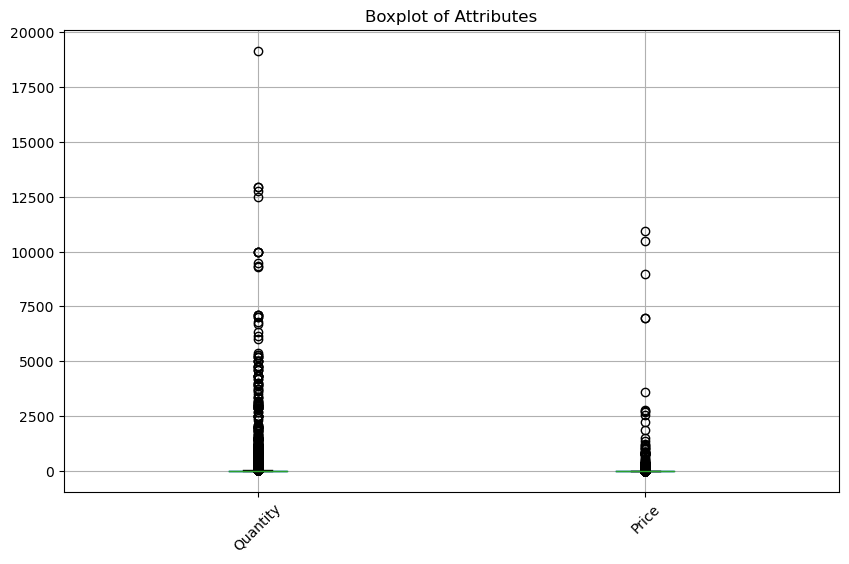


处理后的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB
None


C:\Users\tuzi\AppData\Local\Temp\ipykernel_27168\1058572592.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[col] = replace_outliers(data3[col])
C:\Users\tuzi\AppData\Local\Temp\ipykernel_27168\1058572592.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[col] = replace_outliers(data3[col])


In [19]:
# 异常值处理，将异常值定义为位于1% 和 99% 分位数之外的值，并使用阈值来代替数据中的异常值）
import matplotlib.pyplot as plt
selected_columns = ['Quantity', 'Price']
df_selected = data3[selected_columns]

df_selected.boxplot(figsize=(10, 6))
plt.title('Boxplot of Attributes')
plt.xticks(rotation=45)
plt.show()
# 将数据列series中所有小于1%分位数Q1的值替换为Q1，将大于99%分位数Q3的值替换为Q3。
def replace_outliers(series):
    Q1 = series.quantile(0.01)
    Q3 = series.quantile(0.99)
    series = series.where(series >= Q1, Q1)
    series = series.where(series <= Q3, Q3)
    return series

data4=data3
for col in selected_columns:
    data4[col] = replace_outliers(data3[col])

# 打印处理后的数据信息
print("\n处理后的数据信息：")
print(data4.info())





In [23]:
# 因为每个stock code代表一种产品，所以Description和StockCode应该相互唯一对应，
# 如果一个StockCode在数据集中对应了多个不同的Description，那么就删除所有含有这个StockCode的行
data5=data4
# 检查每个StockCode对应的Description的唯一数量
stockcode_description_counts = data4.groupby('StockCode')['Description'].nunique()

# 找出需要删除的StockCode
duplicate_stockcodes = stockcode_description_counts[stockcode_description_counts > 1].index.tolist()

# 删除含有重复StockCode的行
data5 = data4[~data4['StockCode'].isin(duplicate_stockcodes)]
# print(data4.head())



# 打印处理后的数据信息
print("\n处理后的数据信息：")
print(data5.info())


处理后的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 320650 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      320650 non-null  object        
 1   StockCode    320650 non-null  object        
 2   Description  320650 non-null  object        
 3   Quantity     320650 non-null  int64         
 4   InvoiceDate  320650 non-null  datetime64[ns]
 5   Price        320650 non-null  float64       
 6   Customer ID  320650 non-null  float64       
 7   Country      320650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 22.0+ MB
None


In [24]:
# stock code中的POST表示邮费，并不代表产品，将其删除；
data6 = data5[data5['StockCode'] != 'POST']

# 打印处理后的数据信息
print("\n处理后的数据信息：")
print(data6.info())


处理后的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 319912 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      319912 non-null  object        
 1   StockCode    319912 non-null  object        
 2   Description  319912 non-null  object        
 3   Quantity     319912 non-null  int64         
 4   InvoiceDate  319912 non-null  datetime64[ns]
 5   Price        319912 non-null  float64       
 6   Customer ID  319912 non-null  float64       
 7   Country      319912 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 22.0+ MB
None


## Preparing Invoice-Product Matrix for ARL Data Structure


- 将原始数据转换为适合进行关联规则分析的格式，例如：其中每一行代表一笔交易，每一列代表一个产品，单元格的值表示该产品在该笔交易中是否存在（1 表示存在，0 表示不存在）。

In [25]:
# 转换数据格式
data7 = data6.pivot_table(index='Invoice', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

# 将数量大于1的值设置为1
data7 = data7.applymap(lambda x: 1 if x > 0 else 0)
# 打印转换后的数据信息
print("转换后的数据信息：")
print(data7.info())
print(data7.head())

C:\Users\tuzi\AppData\Local\Temp\ipykernel_27168\3583486774.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data7 = data7.applymap(lambda x: 1 if x > 0 else 0)


转换后的数据信息：
<class 'pandas.core.frame.DataFrame'>
Index: 18710 entries, 489434 to 538171
Columns: 3592 entries, 10002 to TEST002
dtypes: int64(3592)
memory usage: 512.9 MB
None
StockCode  10002  10080  10109  10120  10125  10133  10134  10135  10138  \
Invoice                                                                    
489434         0      0      0      0      0      0      0      0      0   
489436         0      0      0      0      0      0      0      0      0   
489437         1      0      0      0      0      0      0      0      0   
489438         0      0      0      0      0      0      0      0      0   
489439         0      0      0      0      0      0      0      0      0   

StockCode  11001  ...  90214Y  90214Z  ADJUST2  C2  D  M  PADS  SP1002  \
Invoice           ...                                                    
489434         0  ...       0       0        0   0  0  0     0       0   
489436         0  ...       0       0        0   0  0  0     0       0

## Determination of Association Rules

- 使用Apriori计算support values，min_support设置为0.01；
- 从频繁项集中生成关联规则，评估关联规则的指标为support，最小支持度阈值为 0.01；
- 查看支持度最高的前五个关联规则。

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules
# 使用Apriori算法计算支持度
frequent_itemsets = apriori(data7, min_support=0.01, use_colnames=True)
# 从频繁项集中生成关联规则
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.01)

# 查看支持度最高的前五个关联规则
top_5_rules = rules.sort_values(by='support', ascending=False).head(5)
print(top_5_rules)

    antecedents consequents  antecedent support  consequent support   support  \
70     (85123A)     (21733)            0.161464            0.053127  0.038589   
71      (21733)    (85123A)            0.053127            0.161464  0.038589   
54      (21232)     (21231)            0.071352            0.043185  0.033244   
55      (21231)     (21232)            0.043185            0.071352  0.033244   
251    (82494L)     (82482)            0.053928            0.043720  0.029610   

     confidence       lift  leverage  conviction  zhangs_metric  
70     0.238994   4.498564  0.030011    1.244239       0.927458  
71     0.726358   4.498564  0.030011    3.064354       0.821342  
54     0.465918  10.788760  0.030163    1.791511       0.977024  
55     0.769802  10.788760  0.030163    4.034126       0.948262  
251    0.549058  12.558538  0.027252    2.120630       0.972836  


分析以上输出结果，其中每一列的含义是：
- antecedents：关联规则的前件，即条件部分。例如，(85123A)表示商品代码为85123A的商品。
- consequents：关联规则的后件，即结论部分。例如，(21733)表示商品代码为21733的商品。

- antecedent support：前件的支持度。支持度是指包含前件的交易数量与总交易数量的比例。

- consequent support：后件的支持度。支持度是指包含后件的交易数量与总交易数量的比例。

- support：关联规则的支持度。支持度是指同时包含前件和后件的交易数量与总交易数量的比例。

- confidence：关联规则的置信度。置信度是指在前件出现的情况下，后件也出现的概率。

- lift：关联规则的提升度。提升度是指两个商品一起出现的概率与各自独立出现的概率之比。提升度大于1表示两个商品之间存在正向关联，提升度小于1表示两个商品之间存在负向关联。

- leverage：关联规则的杠杆率。杠杆率是支持度与前件支持度和后件支持度的乘积之差。

- conviction：关联规则的确信度。确信度指当前件出现而后件没有出现时，观察到的结果与预期结果之间的差距。确信度大于1表示两个商品之间存在正向关联。

- zhangs_metric：这是一个衡量关联规则质量的指标，取值范围在0和1之间。数值越接近1，关联规则的质量越好。